In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets

dataset = datasets.load_boston()
data, target = dataset.data, dataset.target

print(data.shape)
print(target.shape)

(506, 13)
(506,)


In [ ]:
\
print(dataset.DESCR)

NameError: ignored

In [ ]:
import pandas as pd

# Create a dataframe
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target

df.sample(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
68,0.13554,12.5,6.07,0.0,0.409,5.594,36.8,6.4980,4.0,345.0,18.9,396.90,13.09,17.4
115,0.17134,0.0,10.01,0.0,0.547,5.928,88.2,2.4631,6.0,432.0,17.8,344.91,15.76,18.3
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,18.3
242,0.10290,30.0,4.93,0.0,0.428,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22,22.2


In [ ]:
# Describe the info of the Datase
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
# Provide the Summary Statistics of the Dataset

df.describe(include = "all")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# Importing graphics package for visualization

import seaborn as sns
import matplotlib.pyplot as plt

[Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 0, 'Boxplot'),
 Text(0.5, 1.0, 'Boxplot for Median value of owner-occupied homes')]

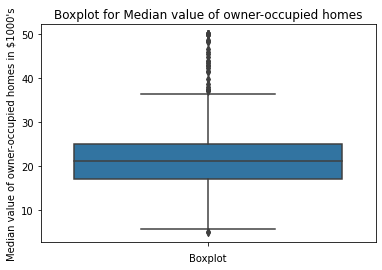

In [ ]:
# Display a Boxplot for the "Median value of owner-occupied homes in $1000's" column.

box = sns.boxplot(y = 'target', data = dataset)
box.set(ylabel = "Median value of owner-occupied homes in $1000's"
        , xlabel = "Boxplot"
        , title = "Boxplot for Median value of owner-occupied homes")

In [ ]:
# Data Pre-processing (Data preparation). Data normalization. 
# map all values in every columns to the range of 0 and 1.

from sklearn import preprocessing

data_scaler = preprocessing.MinMaxScaler()
target_scaler = preprocessing.MinMaxScaler()

data = data_scaler.fit_transform(data)
target = target_scaler.fit_transform(target.reshape(-1, 1))

In [ ]:
# Installing neupy (Artificial Neural Network module)

!pip install neupy

     |████████████████████████████████| 226 kB 7.2 MB/s 
     |████████████████████████████████| 92.7 MB 1.2 MB/s 
     |████████████████████████████████| 3.2 MB 43.3 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
     |████████████████████████████████| 367 kB 60.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0
  Attempting uninstall: progressbar2
    Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progre

In [ ]:
# Splitting dataset 

import neupy
from sklearn.model_selection import train_test_split
from neupy import utils
from neupy.utils.misc import reproducible

# Make sure that split between train and
# validation datasets will be reproducible
utils.reproducible()


x_train, x_test, y_train, y_test = train_test_split(
    # 85% of the data we will use for training
    # and the other 15% will be used for validation
    data, target, test_size=0.15
)

In [ ]:
# Designing a simple neural network

from neupy.layers import *

# Number of features that we want
# to use during the training
n_inputs = 13

# Number of outputs in the network. For the house price
# forecasting we want to predict single value per every
# input sample.
n_outputs = 1

network = join(
    # This layer doesn't do any computation. It just
    # defines how many inputs network should expect.
    Input(n_inputs),

    # Hidden layer. Number of neurons can be adjusted
    # in order to improve performance or deal with overfitting
    Sigmoid(50),

    # Sigmoid outputs values between 0 and 1 and all
    # the prices that we want to predict has been rescaled
    # to the same range.
    Sigmoid(n_outputs),
)

In [ ]:
# Importing a large training algorithm 
# supported by neupy (the LevenbergMarquardt algorithm)

from neupy import algorithms

optimizer = algorithms.LevenbergMarquardt(
    # First argument has to be neural network
    network,

    # With this option enabled network shows its configuration
    # before the training and its progress during the training
    verbose=True,

    # In order to avoid showing information about
    # network training progress after every epoch we can
    # do it less frequently, for example, every 5th epoch.
    show_epoch=5,
)


Main information

[ALGORITHM] LevenbergMarquardt

[OPTION] loss = mse
[OPTION] mu = 0.01
[OPTION] mu_update_factor = 1.2
[OPTION] show_epoch = 5
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] target = Tensor("placeholder/target/sigmoid-2:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
Instructions for updating:
Colocations handled automatically by placer.
[TENSORFLOW] Initialization finished successfully. It took 0.26 seconds


In [ ]:
optimizer.train(x_train, y_train, x_test, y_test, epochs=30) # Training and validating the dataset

#1 : [292 ms] train: 0.063064, valid: 0.027285


#5 : [84 ms] train: 0.009599, valid: 0.014010


#10 : [89 ms] train: 0.005924, valid: 0.009924


#15 : [86 ms] train: 0.004449, valid: 0.008825


#20 : [91 ms] train: 0.003718, valid: 0.009599


#25 : [89 ms] train: 0.003221, valid: 0.008368
#30 : [108 ms] train: 0.002731, valid: 0.008291


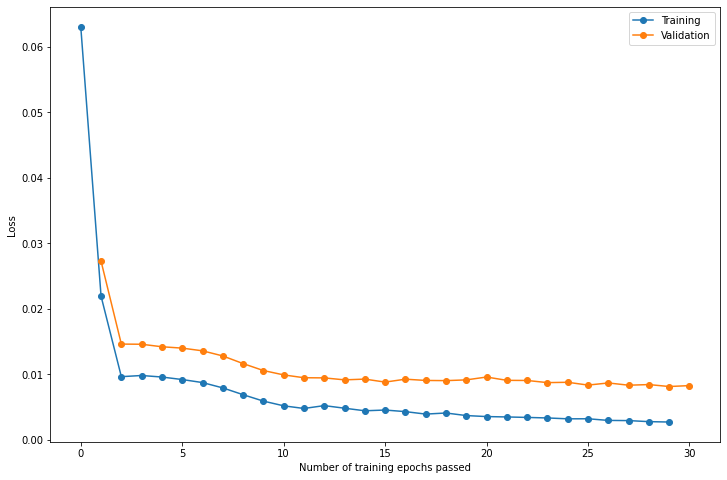

In [ ]:
optimizer.plot_errors()

Visualization of training progress using line plotting

In [ ]:
import numpy as np

def rmsle(expected, predicted):
    log_expected = np.log1p(expected + 1)
    log_predicted = np.log1p(predicted + 1)
    squared_log_error = np.square(log_expected - log_predicted)
    return np.sqrt(np.mean(squared_log_error))

y_predict = optimizer.predict(x_test).round(1)
error = rmsle(
    target_scaler.inverse_transform(y_test),
    target_scaler.inverse_transform(y_predict),
)
print(error)  # ~0.18

0.17411477075295914


Using the Root Means Squared Logarithmic Error (RMSLE) and comparing the prediction to the exact value that was scaled back to the original scale.

The model's average error is $174.11. 
This is the first prototype
